In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# 設定 seaborn 主題，這會影響圖表的風格和顏色
sns.set_theme()  # Apply the default Seaborn theme
%matplotlib inline
# Libraries for statistical and scientific computing
import statsmodels.api as sm
from scipy import stats
from pytorch_lightning.callbacks import EarlyStopping, Callback, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# 使用pandas讀取CSV文件
df = pd.read_csv('https://raw.githubusercontent.com/xc90529/noninvasive_data_visualization/main/noninvasive_data.csv')

# To display the top 5 rows
df.head(5)
#CO-心輸出量
#CI - 心輸出指數
#SV - 舒張容積
#SVI - 舒張容積指數
#SVV - 舒張容積變異度
#SVR - 舒張容積阻力
#SVRI - 舒張容積指數阻力
#PR - 脈搏率
#SYS - 收縮壓
#DIA - 舒張壓
#MAP - 平均動脈壓

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.000000
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.333333
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.666667
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.000000
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.333333


In [3]:
# Calculating the Shock Index as PR / SYS
df['PR/SYS'] = df['PR'] / df['SYS']

# Displaying the first few rows of the dataframe to confirm the new variable
df.head()

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.000000,0.801724
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.333333,0.779661
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.666667,0.760331
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.000000,0.745763
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.333333,1.000000


In [4]:
# Remove the 'ID' column and the 'si1m' column from your DataFrame
columns_to_check = df.drop(columns=['ID', 'si1m', ])

# Use the duplicated method to find duplicate rows
duplicate_rows = df[df.duplicated(subset=columns_to_check, keep=False)]

# Print the content of duplicate rows
print("Duplicate rows:")
print(duplicate_rows)
# 要排除的列名
columns_to_exclude = ['ID', 'si1m']

# 选择除了要排除的列以外的其他列
columns_to_check = df.columns[~df.columns.isin(columns_to_exclude)]

# 使用 selected_columns 作为子集来检查重复行，保留第一个重复行
duplicate_rows_df = df[df.duplicated(subset=columns_to_check, keep='first')]

# 打印重复行的数量
print("重复行的数量：", duplicate_rows_df.shape[0])

# 打印重复行的内容
print("重复行：")
print(duplicate_rows_df)
# 重置索引
df.reset_index(drop=True, inplace=True)

# 在原始数据框 df 中删除重复行
df = df.drop(duplicate_rows_df.index)

# 现在 df 中已经不包含重复行
print(df)

Duplicate rows:
      si1m   CO        CI  SV        SVI  SVV     SVR         SVRI   PR  SYS  \
17619    N  3.1  1.962025  49  31.012658   18  1558.0   986.075949   64   97   
17620    N  3.1  1.962025  49  31.012658   18  1558.0   986.075949   64   97   
17621    Y  2.9  1.835443  46  29.113924   17  1643.0  1039.873418   63   94   
17622    N  2.9  1.835443  46  29.113924   17  1643.0  1039.873418   63   94   
17623    Y  2.8  1.772152  45  28.481013   18  1878.0  1188.607595   62  101   
...    ...  ...       ...  ..        ...  ...     ...          ...  ...  ...   
35911    N  3.1  2.300000  27  20.000000   16  2038.0  2790.000000  116  101   
35912    Y  3.1  2.200000  27  20.000000   16  2045.0  2800.000000  112  101   
35913    N  3.1  2.200000  27  20.000000   16  2045.0  2800.000000  112  101   
35914    Y  2.9  2.100000  29  21.000000   13  2150.0  2945.000000  102  101   
35915    N  2.9  2.100000  29  21.000000   13  2150.0  2945.000000  102  101   

       DIA  MAP    ID  

In [5]:
# 四舍五入 df 中的所有数值列到小数点后第五位
rounded_df = df.round(5)

rounded_df.head()

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,4.0,2.4,43,26.0,10,1673.0,2745.0,93,116,74,91,#_1,120.00000,0.80172
1,N,4.0,2.4,43,26.0,10,1683.0,2760.0,92,118,74,91,#_1,120.33333,0.77966
2,N,3.6,2.2,39,24.0,17,1978.0,3245.0,92,121,80,97,#_1,120.66667,0.76033
3,N,3.6,2.2,41,25.0,17,1868.0,3065.0,88,118,76,93,#_1,121.00000,0.74576
4,N,4.2,2.6,42,26.0,10,1335.0,2190.0,100,100,66,78,#_1,121.33333,1.00000


In [6]:
# 選擇病人 #_9 的數據
id9 = rounded_df[rounded_df['ID'] == '#_9']
id9

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
6590,N,3.6,2.3,46,29.0,19,1444.44444,2260.86957,78,91,57,69,#_9,120.00000,0.85714
6591,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.33333,0.95745
6592,N,4.3,2.8,48,31.0,22,1227.90698,1885.71429,89,88,59,70,#_9,120.66667,1.01136
6593,N,4.4,2.9,47,30.0,20,1236.36364,1875.86207,95,92,59,72,#_9,121.00000,1.03261
6594,N,4.2,2.7,44,28.0,22,1238.09524,1925.92593,96,89,56,69,#_9,121.33333,1.07865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8796,N,3.0,2.0,42,27.0,21,1840.00000,2760.00000,73,90,61,73,#_9,1393.00000,0.81111
8797,N,2.5,1.6,35,22.0,21,2016.00000,3150.00000,73,81,56,67,#_9,1393.33333,0.90123
8798,N,3.4,2.2,46,30.0,34,1694.11765,2618.18182,74,89,63,76,#_9,1394.66667,0.83146
8799,N,2.4,1.5,35,22.0,34,1766.66667,2826.66667,68,70,44,57,#_9,1395.00000,0.97143


相關係數分析

In [7]:
# Convert 'si1m' to a binary variable where 'Y' = 1 and 'N' = 0 for correlation analysis
df['shock'] = df['si1m'].apply(lambda x: 1 if x == 'Y' else 0)

# Drop the 'si1m' column to avoid redundancy and 'ID' column since it's not relevant for correlation analysis
df.drop(['si1m', 'ID'], axis=1, inplace=True)

# Calculate the Pearson correlation coefficient between 'shock' and other variables
correlation_matrix_new = df.corr()

correlation_matrix_new['shock']


CO        0.033251
CI        0.034217
SV       -0.297894
SVI      -0.336060
SVV       0.090539
SVR      -0.122073
SVRI     -0.053453
PR        0.551291
SYS      -0.400070
DIA      -0.045034
MAP      -0.254025
time     -0.052093
PR/SYS    0.648060
shock     1.000000
Name: shock, dtype: float64

機器學習建模

In [8]:
class LossLoggingCallback(Callback):
    def __init__(self):
        super().__init__()
        self.val_losses = []  # To store validation losses
        self.train_losses = []  # To store training losses

    def on_validation_epoch_end(self, trainer, pl_module):
        val_loss = trainer.callback_metrics["val_loss"].item()
        self.val_losses.append(val_loss)
        print(f"Epoch {trainer.current_epoch}: val_loss={val_loss}")

    def on_train_epoch_end(self, trainer, pl_module, unused=None):  # unused parameter for compatibility
        # Assuming you have a metric named "train_loss" logged
        if "train_loss" in trainer.callback_metrics:
            train_loss = trainer.callback_metrics["train_loss"].item()
            self.train_losses.append(train_loss)
            print(f"Epoch {trainer.current_epoch}: train_loss={train_loss}")

In [9]:
# 参数化测试集占总数据的比例
test_ratio = 0.3

# 计算测试集的大小
total_size = len(id9)
test_size = int(total_size * test_ratio)  # 计算测试集大小

# 剩余的为训练集大小
train_size = total_size - test_size

# 定义分割索引
test_start = total_size - test_size

# 分割DataFrame
train_df = id9.iloc[:test_start]
test_df = id9.iloc[test_start:]

# 检查分割结果
print(f"训练集大小：{len(train_df)}")
print(f"测试集大小：{len(test_df)}")


训练集大小：1548
测试集大小：663


In [10]:
train_df
# 查看 'PR/SYS' 列的最大值和最小值
pr_sys_max = train_df['PR/SYS'].max()
pr_sys_min = train_df['PR/SYS'].min()

pr_sys_max, pr_sys_min

(1.44928, 0.30657)

In [11]:
# 假设 train_df 是您的训练数据集DataFrame，且 "py/sys" 是其中的一个特征列

# 计算IQR
Q1 = train_df['PR/SYS'].quantile(0.25)
Q3 = train_df['PR/SYS'].quantile(0.75)
IQR = Q3 - Q1

# 计算异常值的边界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 根据边界过滤异常值
filtered_train_df = train_df[(train_df['PR/SYS'] >= lower_bound) & (train_df['PR/SYS'] <= upper_bound)]

# 检查过滤后的数据
print("原始训练集大小：", len(train_df))
print("移除异常值后的训练集大小：", len(filtered_train_df))


原始训练集大小： 1548
移除异常值后的训练集大小： 1502


In [12]:
# 查找 'PR/SYS' 列的最大值
pr_sys_max = filtered_train_df['PR/SYS'].max()

# 查找 'PR/SYS' 列的最小值
pr_sys_min = filtered_train_df ['PR/SYS'].min()

print(f"'PR/SYS' 最大值: {pr_sys_max}")
print(f"'PR/SYS' 最小值: {pr_sys_min}")


'PR/SYS' 最大值: 1.0
'PR/SYS' 最小值: 0.55556


In [13]:
# 假设 train_df, val_df, test_df 分别是已经处理异常值的训练集、未处理异常值的验证集和测试集
# 如果您已经移除了训练集中的异常值并保存在 filtered_train_df，确保这里使用正确的变量名

# 合并训练集、验证集和测试集
combined_df = pd.concat([filtered_train_df, test_df], axis=0)

# 检查合并后的数据集大小
print(f"合并后的数据集大小: {combined_df.shape}")

# 现在 combined_df 包含了整个数据集，您可以在这个数据集上进行缺失值的填充
 

合并后的数据集大小: (2165, 15)


In [14]:
# 假设 combined_df 是之前合并的DataFrame
# 查看 'PR/SYS' 列的最大值和最小值
pr_sys_max = combined_df['PR/SYS'].max()
pr_sys_min = combined_df['PR/SYS'].min()

pr_sys_max, pr_sys_min


(2.10714, 0.36111)

In [15]:
#找出time 120~1395 從120開始以1為單位 所有的缺失值
# Ensure 'time' is sorted
data_sorted = combined_df.sort_values(by='time')

# Generate the full range of desired time values
full_time_range = pd.Series(range(120, 1396))

# Find missing time values
missing_times = full_time_range[~full_time_range.isin(data_sorted['time'])]

# Print the first 10 missing time values
missing_times.head(10).tolist()


[121, 122, 123, 124, 125, 126, 127, 128, 133, 134]

In [16]:
# 從120開始以1為單位 所有的缺失值用上一筆資料進行填充
# Correct the process of filling values considering fractional times properly
filled_values_corrected_proper = pd.DataFrame()

for missing_time in missing_times:
    # Find the closest previous time point, correctly handling fractional times
    closest_time = data_sorted[data_sorted['time'] < missing_time]['time'].max()
    # Copy the data from the closest time point
    row_to_copy = data_sorted[data_sorted['time'] == closest_time].copy()
    # Update the time to the missing time
    row_to_copy['time'] = missing_time
    # Append to the corrected filled values DataFrame
    filled_values_corrected_proper = pd.concat([filled_values_corrected_proper, row_to_copy], ignore_index=True)

# Concatenate the original sorted data with the properly filled values and sort by time
final_data_properly_filled = pd.concat([data_sorted, filled_values_corrected_proper], ignore_index=True).sort_values(by='time')

# To ensure accuracy, let's check the filled values, especially around the first few missing times, with accurate reference points
check_points = [120, 120.33333, 120.66667, 121]  # Reference points to check if the fill was correct
final_check = final_data_properly_filled[final_data_properly_filled['time'].isin(check_points + missing_times.tolist())]

final_check.head(10)  # Displaying more rows to observe the transition around the mentioned check points and first few filled values


,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,3.6,2.3,46,29.0,19,1444.44444,2260.86957,78,91,57,69,#_9,120.00000,0.85714
1,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.33333,0.95745
2165,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,121.00000,0.95745
2166,N,4.3,2.8,50,32.0,19,1265.11628,1942.85714,87,94,58,72,#_9,122.00000,0.92553
2167,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,123.00000,0.89247
2168,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,124.00000,0.89247
2169,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,125.00000,0.89247
2170,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,126.00000,0.89247
2171,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,127.00000,0.89247
2172,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,128.00000,0.89247


In [17]:
# Generate a list of the specific decimal time points from 120 to 1395, adding .3333333 to each
specific_decimal_times = [x + 0.33333 for x in range(120, 1396)]

# Check which of these specific times are missing in the final_data_properly_filled DataFrame
missing_specific_decimal_times = [time for time in specific_decimal_times if time not in final_data_properly_filled['time'].round(5).tolist()]

# Display the missing times
missing_specific_decimal_times[:10]


[121.33333,
 123.33333,
 124.33333,
 125.33333,
 126.33333,
 127.33333,
 128.33333,
 133.33333,
 150.33333,
 151.33333]

In [18]:
# Initialize a DataFrame to hold the filled values for missing specific decimal times
filled_values_for_missing_decimal = pd.DataFrame()

# Iterate over the sorted list of missing specific decimal times
for missing_time in missing_specific_decimal_times:
    # Find the closest previous time point
    closest_time = final_data_properly_filled[final_data_properly_filled['time'] < missing_time]['time'].max()
    # Copy the data from the closest time point
    row_to_copy = final_data_properly_filled[final_data_properly_filled['time'] == closest_time].copy()
    # Update the time to the missing time
    row_to_copy['time'] = missing_time
    # Append to the filled values DataFrame
    filled_values_for_missing_decimal = pd.concat([filled_values_for_missing_decimal, row_to_copy], ignore_index=True)

# Concatenate the original data with the filled values and sort by 'time'
final_data_with_filled_decimal = pd.concat([final_data_properly_filled, filled_values_for_missing_decimal], ignore_index=True).sort_values(by='time')

# Checking a sample of the filled values
final_data_with_filled_decimal[final_data_with_filled_decimal['time'].isin(missing_specific_decimal_times)].head()


,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
2503,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,121.33333,0.95745
2504,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,123.33333,0.89247
2505,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,124.33333,0.89247
2506,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,125.33333,0.89247
2507,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,126.33333,0.89247


In [19]:
# Generate a list of the specific decimal time points from 120.66666666667 to 1395, adding .66666666667 to each integer
specific_decimal_times_66667 = [120.66667 + x for x in range(0, 1394 - 120 + 1)]

# Check which of these specific times are missing in the final_data_with_filled_decimal DataFrame
missing_specific_decimal_times_66667 = [time for time in specific_decimal_times_66667 if time not in final_data_with_filled_decimal['time'].round(11).tolist()]

# Display the missing times
missing_specific_decimal_times_66667[:10]


[120.66667,
 123.66667,
 124.66667,
 125.66667,
 126.66667,
 127.66667,
 132.66667,
 133.66667,
 147.66667,
 148.66667]

In [20]:
# Adjust the list of missing specific decimal times to exclude any time points beyond 1395
adjusted_missing_times_66667 = [time for time in missing_specific_decimal_times_66667 if time <= 1395]

# Initialize a new DataFrame for adjusted filling
adjusted_filled_values_for_missing_decimal_66667 = pd.DataFrame()

# Ensure the time column is rounded to match the precision of missing times for accurate comparison
final_data_with_filled_decimal['time'] = final_data_with_filled_decimal['time'].round(11)

# Iterate over the adjusted list of missing specific decimal times ending with .66667
for missing_time in adjusted_missing_times_66667:
    # Find the closest previous time point
    closest_time = final_data_with_filled_decimal[final_data_with_filled_decimal['time'] < missing_time]['time'].max()
    # Copy the data from the closest time point
    row_to_copy = final_data_with_filled_decimal[final_data_with_filled_decimal['time'] == closest_time].copy()
    # Update the time to the missing time
    row_to_copy['time'] = missing_time
    # Append to the filled values DataFrame
    adjusted_filled_values_for_missing_decimal_66667 = pd.concat([adjusted_filled_values_for_missing_decimal_66667, row_to_copy], ignore_index=True)

# Concatenate the current data with the adjusted filled values and sort by 'time'
final_data_adjusted_with_all_filled = pd.concat([final_data_with_filled_decimal, adjusted_filled_values_for_missing_decimal_66667], ignore_index=True).sort_values(by='time')

# Show a sample of the filled values to verify, focusing on the adjusted range
final_data_adjusted_with_all_filled[final_data_adjusted_with_all_filled['time'].isin(adjusted_missing_times_66667)].head()


,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
3171,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.66667,0.95745
3172,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,123.66667,0.89247
3173,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,124.66667,0.89247
3174,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,125.66667,0.89247
3175,N,4.8,3.1,58,37.0,9,1200.00000,1858.06452,83,93,59,76,#_9,126.66667,0.89247


In [21]:
final_data_adjusted_with_all_filled

,si1m,CO,CI,SV,SVI,SVV,SVR,SVRI,PR,SYS,DIA,MAP,ID,time,PR/SYS
0,N,3.6,2.3,46,29.0,19,1444.44444,2260.86957,78,91,57,69,#_9,120.00000,0.85714
1,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.33333,0.95745
3171,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,120.66667,0.95745
2,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,121.00000,0.95745
3,N,3.8,2.4,42,27.0,35,1452.63158,2300.00000,90,94,60,73,#_9,121.33333,0.95745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3166,N,2.5,1.6,35,22.0,21,2016.00000,3150.00000,73,81,56,67,#_9,1394.00000,0.90123
3167,N,2.5,1.6,35,22.0,21,2016.00000,3150.00000,73,81,56,67,#_9,1394.33333,0.90123
3168,N,3.4,2.2,46,30.0,34,1694.11765,2618.18182,74,89,63,76,#_9,1394.66667,0.83146
3169,N,2.4,1.5,35,22.0,34,1766.66667,2826.66667,68,70,44,57,#_9,1395.00000,0.97143


In [22]:
# 選擇要較爲相關的變相，進行特徵選取
selected_features_df = final_data_adjusted_with_all_filled[['PR/SYS','PR', 'SYS', 'SVI', 'MAP', 'time']]
# 將'time'設置為索引
selected_features_df .set_index('time', inplace=True)
selected_features_df 

,PR/SYS,PR,SYS,SVI,MAP
time,,,,,
120.00000,0.85714,78,91,29.0,69
120.33333,0.95745,90,94,27.0,73
120.66667,0.95745,90,94,27.0,73
121.00000,0.95745,90,94,27.0,73
121.33333,0.95745,90,94,27.0,73
...,...,...,...,...,...
1394.00000,0.90123,73,81,22.0,67
1394.33333,0.90123,73,81,22.0,67
1394.66667,0.83146,74,89,30.0,76


In [23]:
# 將時間填充好且特徵選取過後的數據，另存到桌面上 CSV 文件
selected_features_df .to_csv('~/Desktop/id9_Fin.csv')


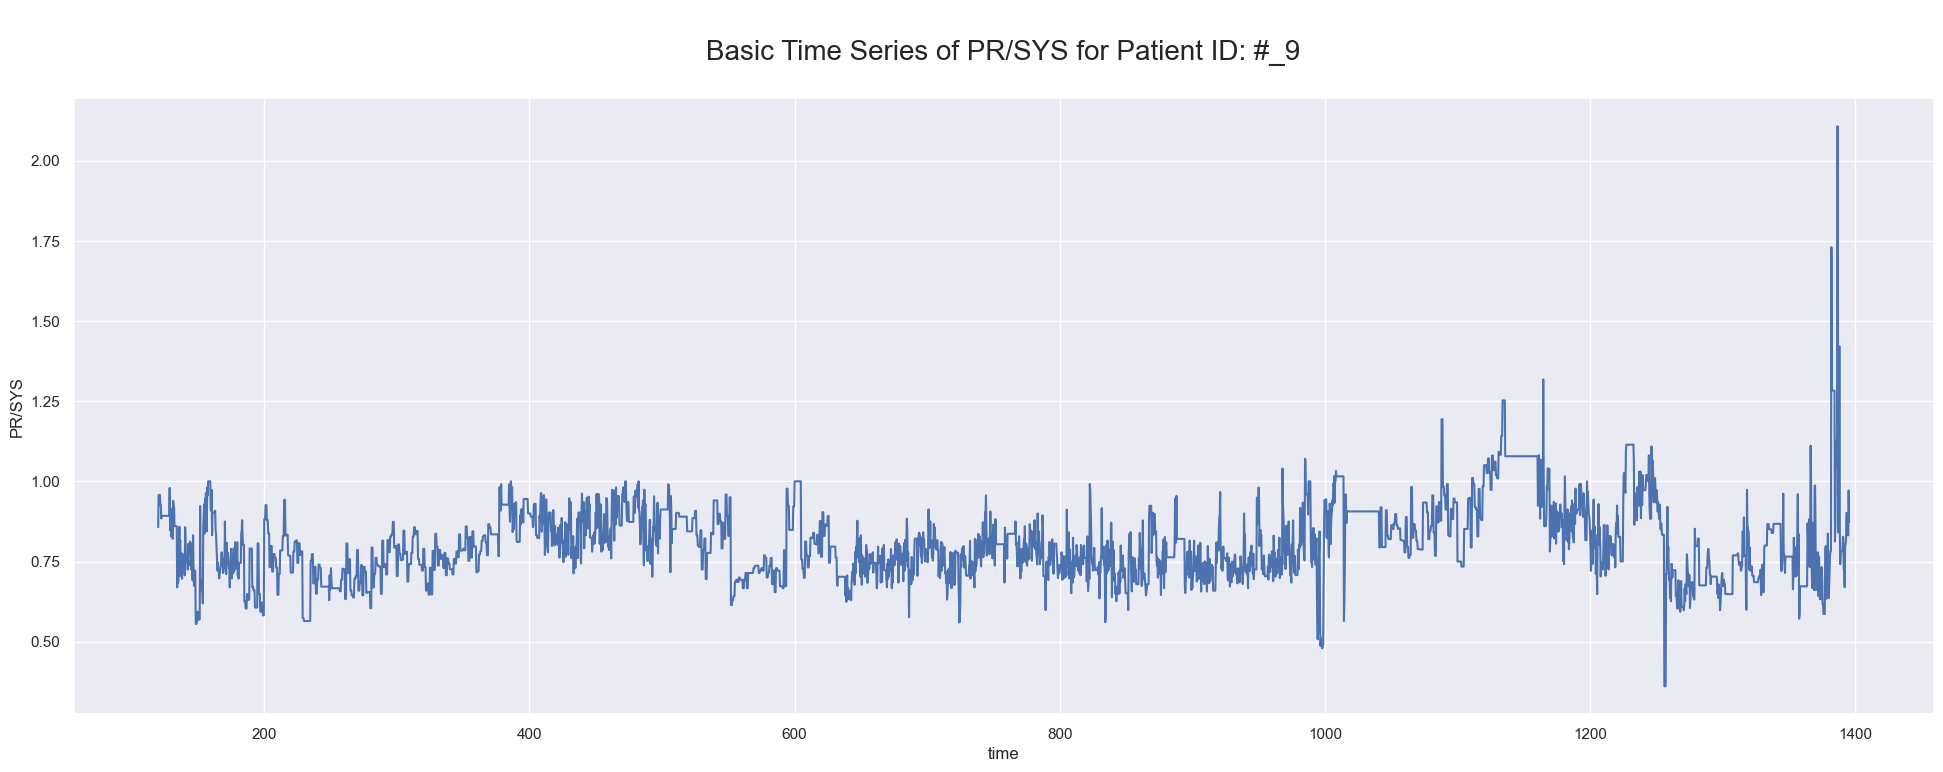

In [24]:
# 使用 Seaborn 绘制线性图，展示 ID #_9 的患者的 PR/SYS 随时间的变化
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=selected_features_df, x='time', y='PR/SYS')  # 使用筛选后的数据
ax.set_title("\nBasic Time Series of PR/SYS for Patient ID: #_9\n", fontsize=20)
plt.show()


In [25]:
# 参数化测试集和验证集占总数据的比例
test_ratio = 0.15
val_ratio = 0.15  # 假设验证集从原始训练数据中分割出的比例

# 计算测试集和验证集的大小
total_size = len(selected_features_df)
test_size = int(total_size * test_ratio)  # 计算测试集大小
val_size = int((total_size - test_size) * val_ratio)  # 计算验证集大小，注意从剩余数据中计算

# 分割索引
test_start = total_size - test_size
val_start = test_start - val_size  # 从剩余数据中分割出验证集

# 分割DataFrame为训练集、验证集和测试集
train_df = selected_features_df.iloc[:val_start]
val_df = selected_features_df.iloc[val_start:test_start]
test_df = selected_features_df.iloc[test_start:]

# 检查分割结果
print(f"训练集大小：{len(train_df)}")
print(f"验证集大小：{len(val_df)}")
print(f"测试集大小：{len(test_df)}")


训练集大小：2766
验证集大小：487
测试集大小：574


數據縮放後，將資料轉換為監督學習格式

In [26]:
# 使用MinMaxScaler进行缩放
scale = MinMaxScaler()
columns = train_df.columns

df_train_scaled = train_df.copy()
df_test_scaled = test_df.copy()
df_val_scaled = val_df.copy()
# 對訓練集的數值列进行擬合和转换，用相同的scaler避免数据泄露
df_train_scaled[columns] = scale.fit_transform(train_df[columns])
# 使用相同的scaler参数来转换测试集和驗證集的数值列
df_test_scaled[columns] = scale.transform(test_df[columns])
df_val_scaled[columns] = scale.transform(val_df[columns])



In [27]:
#转换DataFrame为Numpy数组
data_train = np.array(train_df)
data_val = np.array(val_df)
data_test = np.array(test_df)
#初始化空列表X和y
X_train = []
y_train = []
#定義歷史資料長度和預測長度
n_future = 1
n_past = 12


In [28]:
for i in range(n_past, len(data_train) - n_future + 1):
    X_train.append(data_train[i - n_past: i, 1:])
    y_train.append(data_train[i : i+n_future, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)


In [29]:
print(X_train.shape)
print(y_train.shape)


(2754, 12, 4)
(2754, 1)


In [30]:
X_val = []
y_val = []
for i in range(n_past, len(data_val) - n_future + 1):
    X_val.append(data_val[i - n_past: i, 1:])
    y_val.append(data_val[i : i+n_future, 0])
    
X_val, y_val = np.array(X_val), np.array(y_val)

In [31]:
X_test = []
y_test = []
for i in range(n_past, len(data_test) - n_future + 1):
    X_test.append(data_test[i - n_past: i, 1:])
    y_test.append(data_test[i : i+n_future, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [32]:
print('train data'.center(64, '-'))
print(X_train.shape)
print(y_train.shape)
print('validation data'.center(64, '-'))
print(X_val.shape)
print(y_val.shape)
print('test data'.center(64, '-'))
print(X_test.shape)
print(y_test.shape)

---------------------------train data---------------------------
(2754, 12, 4)
(2754, 1)
------------------------validation data-------------------------
(475, 12, 4)
(475, 1)
---------------------------test data----------------------------
(562, 12, 4)
(562, 1)


lstm模型建立


In [33]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import torch
from torch.utils.data import DataLoader
device = torch.device('cpu')



In [34]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, batch_size, dropout, device):
        super(LSTMModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.dropout = dropout
        self.device = device

        self.lstm = nn.LSTM(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers,
            batch_first=True
            )
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(in_features=hidden_size, out_features=output_size)
        
        return
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
        out, _ = self.lstm(x, (h0, c0))
        
        out = self.dropout(out)
        # out = out.contiguous().view(-1, self.hidden_size)
        out = out[:, -1, :]
        out = self.fc(out)
        return out


input_size = 4
hidden_size = 64
num_layers = 2
output_size = 1
batch_size = 128
drop_rate = 0.3

model = LSTMModel(
    input_size=input_size, 
    hidden_size=hidden_size,
    num_layers=num_layers,
    output_size=output_size,
    batch_size=batch_size,
    dropout=drop_rate,
    device=device
).to(device)
model

LSTMModel(
  (lstm): LSTM(4, 64, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [35]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_val_tensor = torch.from_numpy(X_val.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_val_tensor = torch.from_numpy(y_val.astype(np.float32).reshape(-1, 1))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    drop_last=True,
    shuffle=True
)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(
    val_dataset,
    batch_size=batch_size,
    drop_last = True,
    shuffle=False
)

In [36]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.MSELoss()

train_loss_arr = []
val_loss_arr = []

for epoch in range(50):
    model.train()
    train_loss = []
    val_loss = []

    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.reshape(-1, n_past, input_size).to(device)
        labels = labels.reshape(-1, output_size).to(device)
        
        outputs = model(inputs)
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        loss.backward()
        train_loss.append(loss.item())
        optimizer.step()

    model.eval()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.reshape(-1, n_past, input_size).to(device)
            labels = labels.reshape(-1, output_size).to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss.append(loss.item())

    epoch_train_loss = sum(train_loss)/len(train_loss)
    epoch_val_loss = sum(val_loss)/len(val_loss)

    train_loss_arr.append(epoch_train_loss)
    val_loss_arr.append(epoch_val_loss)

    print(f'Epoch [{epoch+1}/{50}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}')

Epoch [1/50], Train Loss: 0.0876, Val Loss: 0.0562
Epoch [2/50], Train Loss: 0.0186, Val Loss: 0.0421
Epoch [3/50], Train Loss: 0.0163, Val Loss: 0.0373
Epoch [4/50], Train Loss: 0.0136, Val Loss: 0.0303
Epoch [5/50], Train Loss: 0.0107, Val Loss: 0.0129
Epoch [6/50], Train Loss: 0.0092, Val Loss: 0.0091
Epoch [7/50], Train Loss: 0.0081, Val Loss: 0.0099
Epoch [8/50], Train Loss: 0.0083, Val Loss: 0.0088
Epoch [9/50], Train Loss: 0.0078, Val Loss: 0.0074
Epoch [10/50], Train Loss: 0.0071, Val Loss: 0.0080
Epoch [11/50], Train Loss: 0.0075, Val Loss: 0.0094
Epoch [12/50], Train Loss: 0.0069, Val Loss: 0.0107
Epoch [13/50], Train Loss: 0.0068, Val Loss: 0.0069
Epoch [14/50], Train Loss: 0.0074, Val Loss: 0.0126
Epoch [15/50], Train Loss: 0.0066, Val Loss: 0.0073
Epoch [16/50], Train Loss: 0.0067, Val Loss: 0.0094
Epoch [17/50], Train Loss: 0.0068, Val Loss: 0.0102
Epoch [18/50], Train Loss: 0.0065, Val Loss: 0.0078
Epoch [19/50], Train Loss: 0.0063, Val Loss: 0.0097
Epoch [20/50], Train 

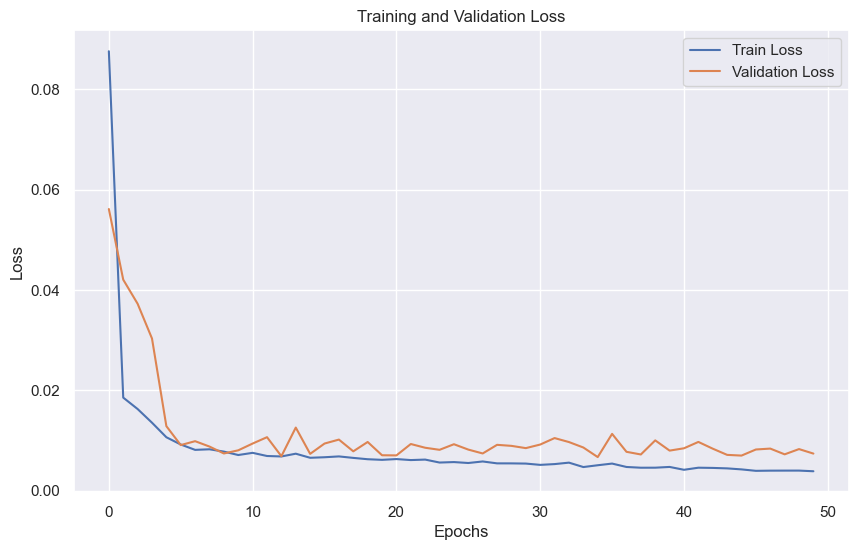

In [37]:
import matplotlib.pyplot as plt

# 确保在notebook中可以显示图像
%matplotlib inline

# 绘制训练损失和验证损失
plt.figure(figsize=(10, 6))  # 设置图像大小
plt.plot(train_loss_arr, label='Train Loss')  # 绘制训练损失
plt.plot(val_loss_arr, label='Validation Loss')  # 绘制验证损失
plt.title('Training and Validation Loss')  # 图像标题
plt.xlabel('Epochs')  # x轴标签
plt.ylabel('Loss')  # y轴标签
plt.legend()  # 显示图例
plt.show()  # 显示图像


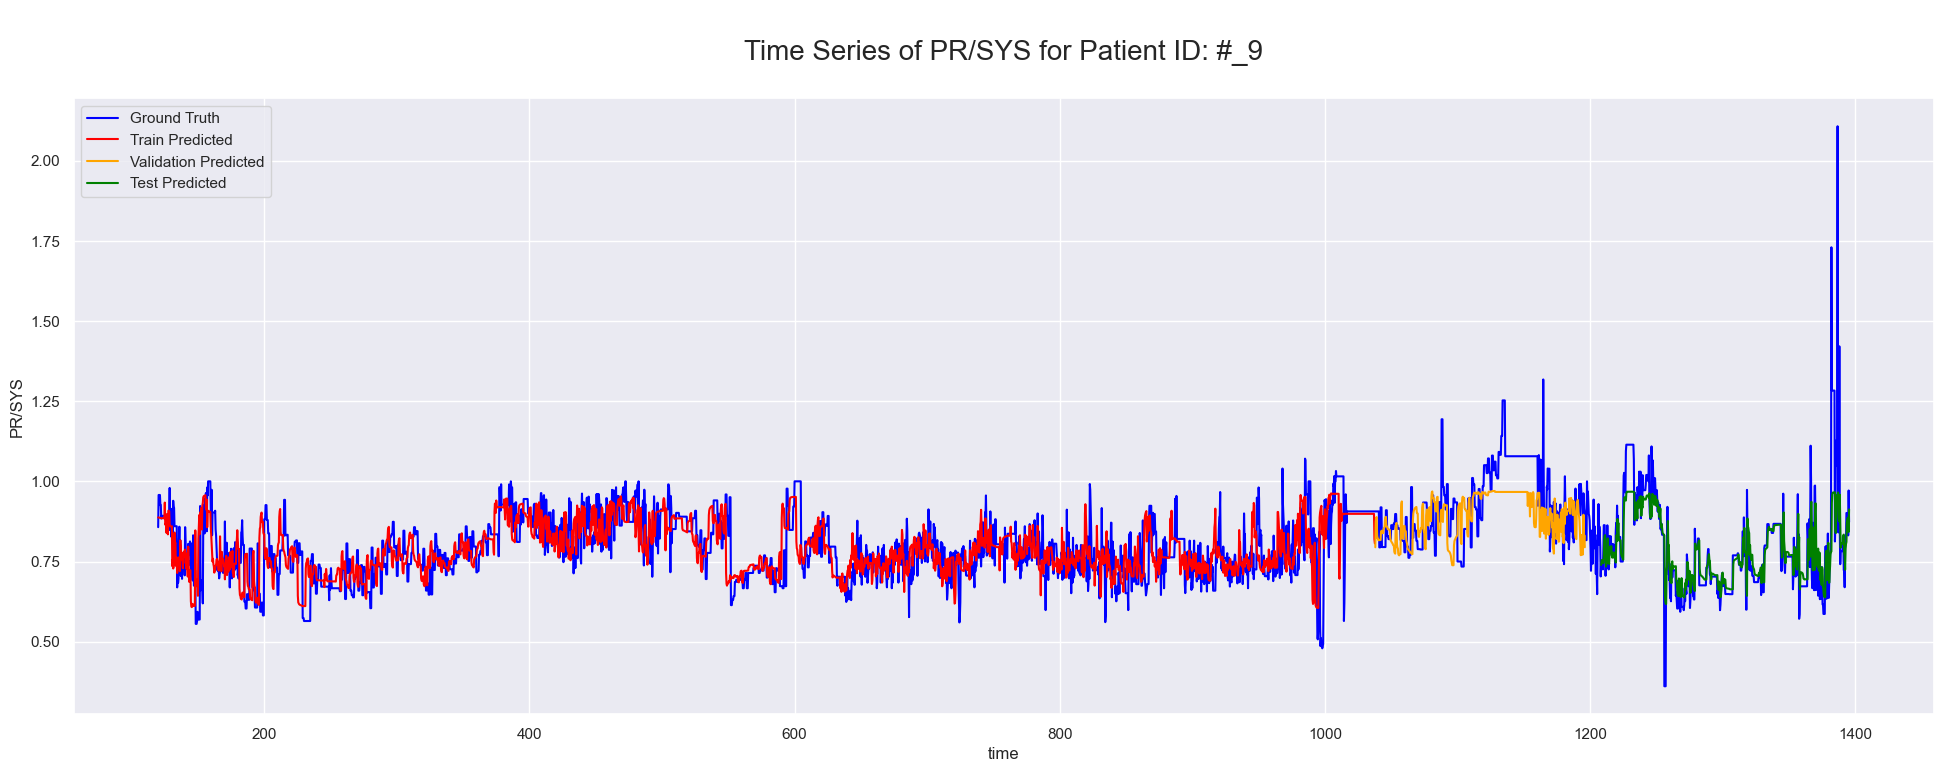

In [38]:
model.eval()  # 将模型设置为评估模式
with torch.no_grad():
    train_predicted = model(X_train_tensor.reshape(-1, n_past, input_size).to(device)).to('cpu')
    val_predicted = model(X_val_tensor.reshape(-1, n_past, input_size).to(device)).to('cpu')
    test_predicted = model(X_test_tensor.reshape(-1, n_past, input_size).to(device)).to('cpu')
# 假设X_train_time, X_val_time, X_test_time是对应的时间信息，且已按顺序排列
# 这里只是示例，你需要根据你的数据情况调整
# 重置索引，使得'time'成为一个列
selected_features_df = selected_features_df.reset_index()

X_train_time = selected_features_df['time'][:len(train_predicted)]
X_val_time = selected_features_df['time'][len(train_predicted):len(train_predicted)+len(val_predicted)]
X_test_time = selected_features_df['time'][-len(test_predicted):]

# 将预测值与时间信息组合成DataFrame
train_predictions_df = pd.DataFrame({'time': X_train_time, 'PR/SYS': train_predicted.squeeze()})
val_predictions_df = pd.DataFrame({'time': X_val_time, 'PR/SYS': val_predicted.squeeze()})
test_predictions_df = pd.DataFrame({'time': X_test_time, 'PR/SYS': test_predicted.squeeze()})

# 使用Seaborn绘制真实值
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=selected_features_df, x='time', y='PR/SYS', label='Ground Truth', color='blue')

# 添加预测结果的线性图层
sns.lineplot(data=train_predictions_df, x='time', y='PR/SYS', ax=ax, label='Train Predicted', color='red')
sns.lineplot(data=val_predictions_df, x='time', y='PR/SYS', ax=ax, label='Validation Predicted', color='orange')
sns.lineplot(data=test_predictions_df, x='time', y='PR/SYS', ax=ax, label='Test Predicted', color='green')

# 设置标题
ax.set_title("\nTime Series of PR/SYS for Patient ID: #_9\n", fontsize=20)

# 显示图例
plt.legend()
plt.show()


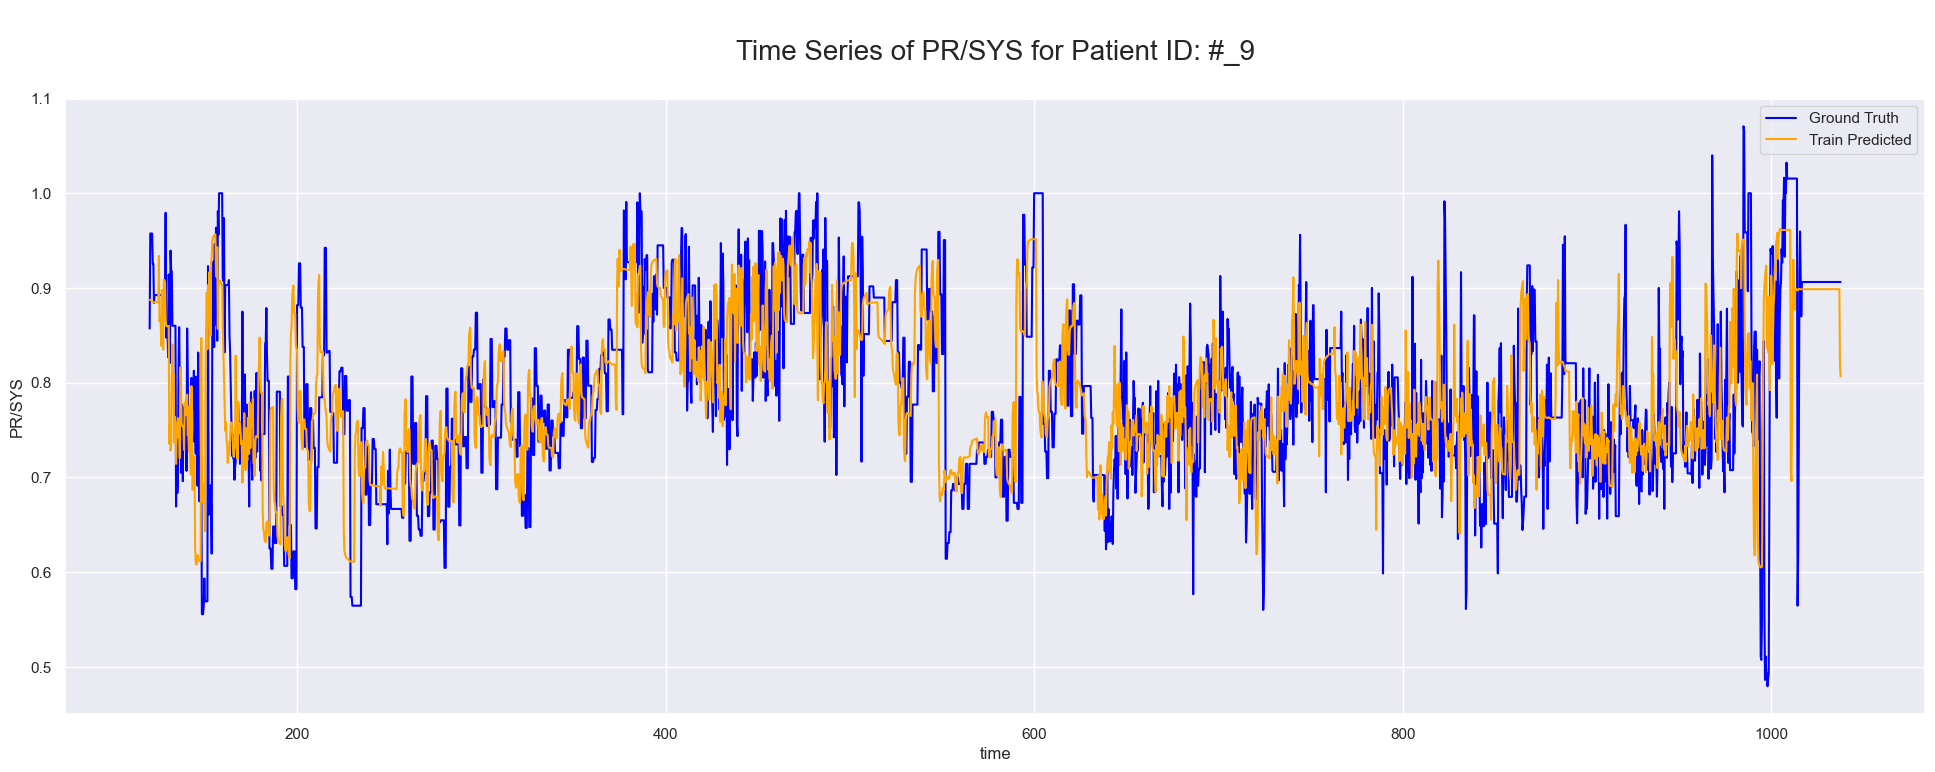

In [39]:
# 如果train_predicted是一个PyTorch张量，需要先将其转换为numpy数组，并调用squeeze()来确保是一维数组
train_predicted_np = train_predicted.detach().numpy().squeeze()

# 接着创建一个包含预测值和时间的DataFrame
train_results_df = pd.DataFrame({
    'time': X_train_time,
    'PR/SYS_predicted': train_predicted_np
})

# 合并真实值DataFrame和预测结果DataFrame
# 假设selected_features_df已经重置索引，且包含训练集的真实值
full_train_df = selected_features_df.loc[selected_features_df['time'].isin(X_train_time)].copy()
full_train_df = full_train_df.merge(train_results_df, on='time')

# 使用Seaborn绘制真实值和预测值
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=full_train_df, x='time', y='PR/SYS', label='Ground Truth', color='blue')
ax = sns.lineplot(data=full_train_df, x='time', y='PR/SYS_predicted', label='Train Predicted', color='orange')

# 设置标题和图例
ax.set_title("\nTime Series of PR/SYS for Patient ID: #_9\n", fontsize=20)
plt.legend()
plt.show()


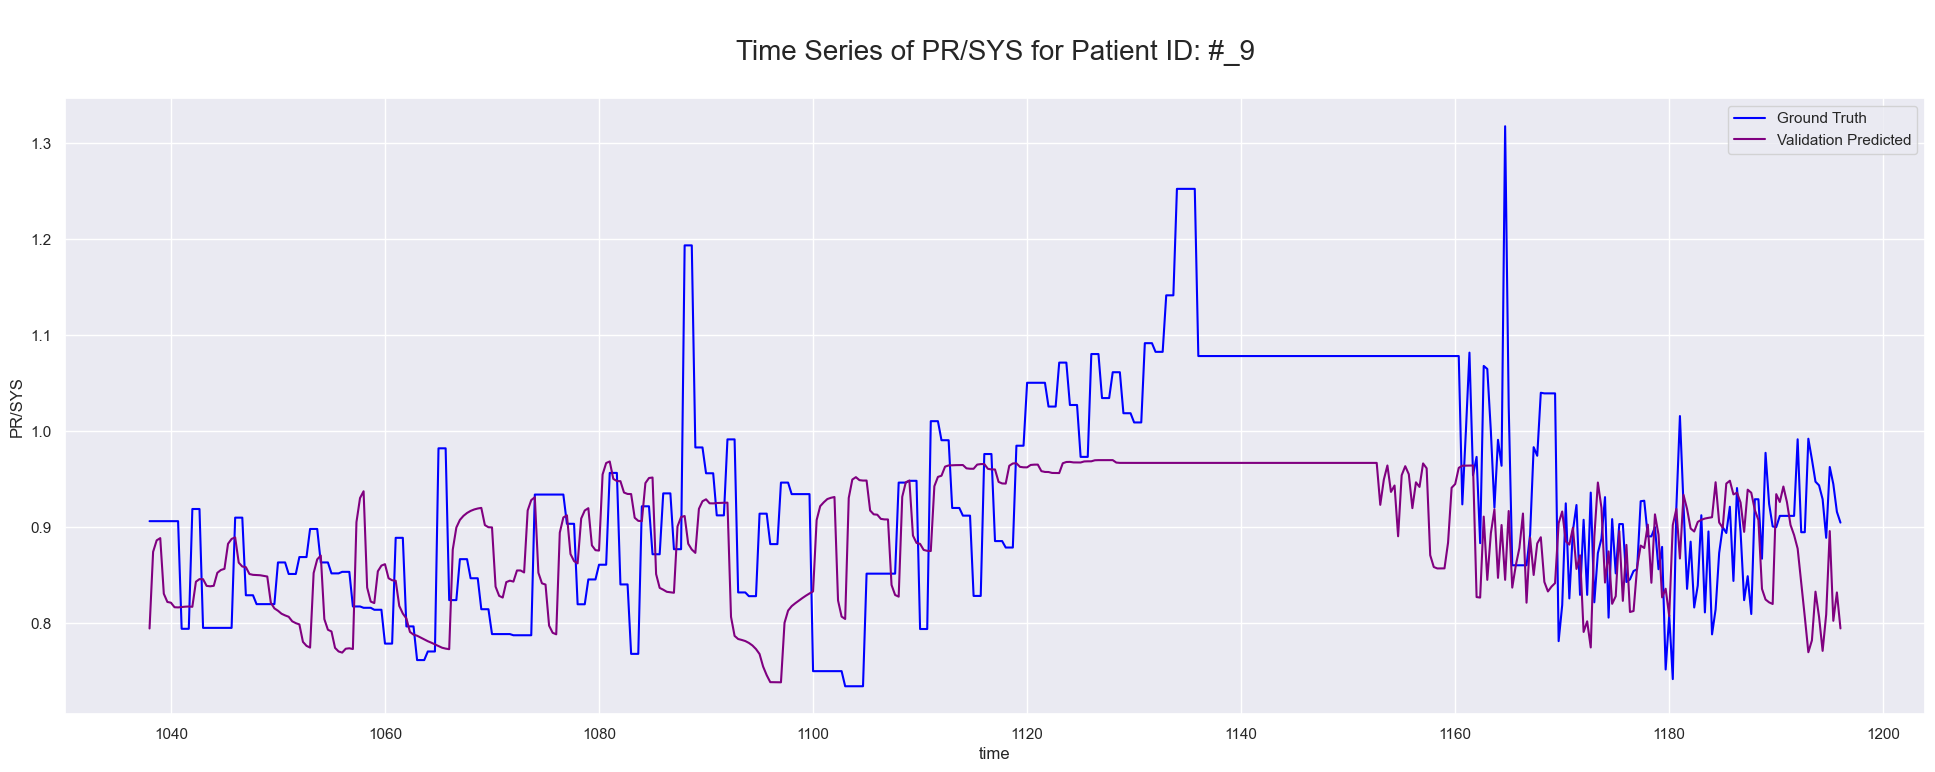

In [40]:
# 如果val_predicted是一个PyTorch张量，需要先将其转换为numpy数组，并调用squeeze()来确保是一维数组
val_predicted_np = val_predicted.detach().numpy().squeeze()

# 创建一个包含预测值和时间的DataFrame
val_results_df = pd.DataFrame({
    'time': X_val_time,
    'PR/SYS_predicted': val_predicted_np
})

# 假设selected_features_df已经重置索引，且包含验证集的真实值
full_val_df = selected_features_df.loc[selected_features_df['time'].isin(X_val_time)].copy()
full_val_df = full_val_df.merge(val_results_df, on='time')

# 使用Seaborn绘制真实值和预测值
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=full_val_df, x='time', y='PR/SYS', label='Ground Truth', color='blue')
ax = sns.lineplot(data=full_val_df, x='time', y='PR/SYS_predicted', label='Validation Predicted', color='purple')

# 设置标题和图例
ax.set_title("\nTime Series of PR/SYS for Patient ID: #_9\n", fontsize=20)
plt.legend()
plt.show()


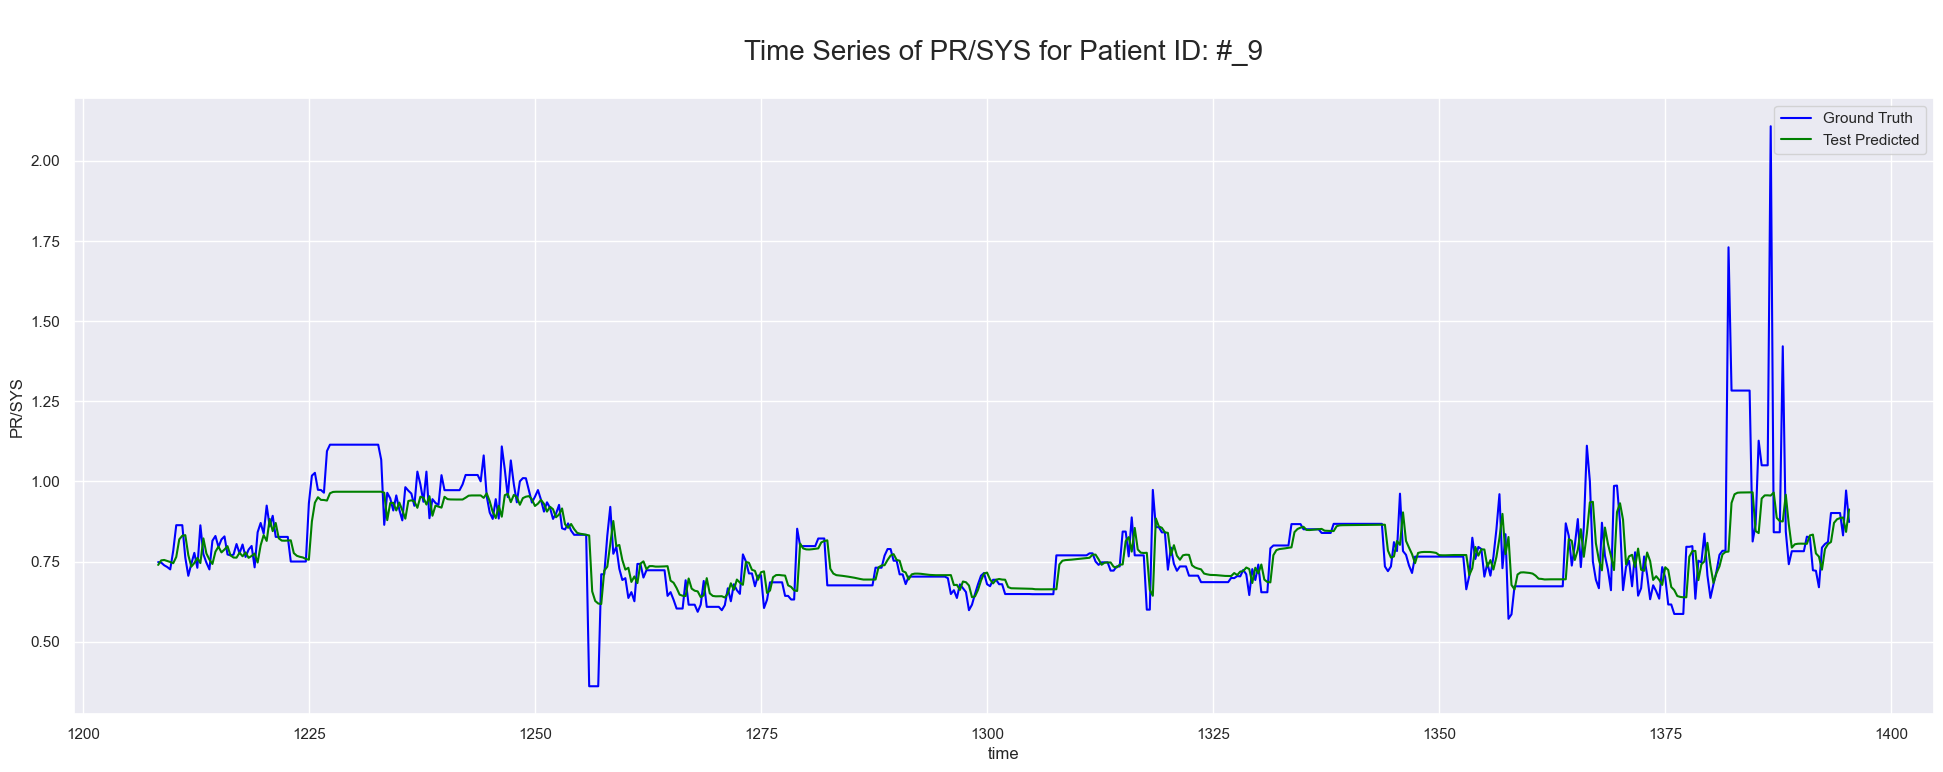

In [41]:
# 如果test_predicted是一个PyTorch张量，需要先将其转换为numpy数组，并调用squeeze()来确保是一维数组
test_predicted_np = test_predicted.detach().numpy().squeeze()

# 接着创建一个包含预测值和时间的DataFrame
test_results_df = pd.DataFrame({
    'time': X_test_time,
    'PR/SYS_predicted': test_predicted_np
})

# 合并真实值DataFrame和预测结果DataFrame
# 假设selected_features_df已经重置索引，且包含测试集的真实值
full_test_df = selected_features_df.loc[selected_features_df['time'].isin(X_test_time)].copy()
full_test_df = full_test_df.merge(test_results_df, on='time')

# 使用Seaborn绘制真实值和预测值
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=full_test_df, x='time', y='PR/SYS', label='Ground Truth', color='blue')
ax = sns.lineplot(data=full_test_df, x='time', y='PR/SYS_predicted', label='Test Predicted', color='green')

# 设置标题和图例
ax.set_title("\nTime Series of PR/SYS for Patient ID: #_9\n", fontsize=20)
plt.legend()
plt.show()


In [42]:
from torchmetrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError
import torch

# 初始化指标计算的对象
mae = MeanAbsoluteError()
mape = MeanAbsolutePercentageError()
mse = MeanSquaredError(squared=False)  # 设置squared=False以直接得到RMSE

# 计算MAE和MAPE以及RMSE
mae_score = mae(train_predicted, y_train_tensor)
mape_score = mape(train_predicted, y_train_tensor)
rmse_score = mse(train_predicted, y_train_tensor)

# 打印结果
print(f"MAE_train: {mae_score}")
print(f"MAPE_train: {mape_score}")
print(f"RMSE_train: {rmse_score}")


MAE_train: 0.03354305401444435
MAPE_train: 0.04352135956287384
RMSE_train: 0.04929973930120468


In [43]:
from torchmetrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError
import torch

# 初始化指标计算的对象
mae = MeanAbsoluteError()
mape = MeanAbsolutePercentageError()
mse = MeanSquaredError(squared=False)  # 设置squared=False以直接得到RMSE

# 计算MAE和MAPE以及RMSE
mae_score = mae(val_predicted, y_val_tensor)
mape_score = mape(val_predicted, y_val_tensor)
rmse_score = mse(val_predicted, y_val_tensor)

# 打印结果
print(f"MAE_val: {mae_score}")
print(f"MAPE_val: {mape_score}")
print(f"RMSE_val: {rmse_score}")


MAE_val: 0.05818351358175278
MAPE_val: 0.058544378727674484
RMSE_val: 0.08162428438663483


In [44]:
from torchmetrics import MeanAbsoluteError, MeanAbsolutePercentageError, MeanSquaredError
import torch

# 初始化指标计算的对象
mae = MeanAbsoluteError()
mape = MeanAbsolutePercentageError()
mse = MeanSquaredError(squared=False)  # 设置squared=False以直接得到RMSE

# 计算MAE和MAPE以及RMSE
mae_score = mae(test_predicted, y_test_tensor)
mape_score = mape(test_predicted, y_test_tensor)
rmse_score = mse(test_predicted, y_test_tensor)

# 打印结果
print(f"MAE_test: {mae_score}")
print(f"MAPE_test: {mape_score}")
print(f"RMSE_test: {rmse_score}")


MAE_test: 0.05474070459604263
MAPE_test: 0.06676959991455078
RMSE_test: 0.10417821258306503
